In [1]:
pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 106.0 MB/s eta 0:00:00


In [2]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [7]:
import pandas as pd
import numpy as np
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.lsHRkLg1O3/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.2jdI18Lqgu/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.CPiJZBOlmE/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [16]:
!apt-get update
!apt-get upgrade
!apt-get install -y unzip xvfb libxi6 libgconf-2-4
!pip install pyvirtualdisplay
!pip install xvfbwrapper

# Download and install the compatible version of ChromeDriver
!wget https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_linux64.zip
#!wget https://chromedriver.storage.googleapis.com/116.0.5845.36/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!chmod +x chromedriver
!mv chromedriver /usr/local/bin

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://deb.debian.org/debian buster-updates InRelease
Hit:6 http://deb.debian.org/debian-security buster/updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [19]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

def driversetup():
    # Set the path to the newly installed ChromeDriver
    chrome_driver_path = "/usr/local/bin/chromedriver"
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")

    driver = webdriver.Chrome(service=Service(chrome_driver_path), options=options)
    #driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [20]:
driver = driversetup()

In [ ]:
#driver.get("https://www.agoda.com/th-th/scent-of-sukhothai-resort/reviews/sukhothai-th.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adults=2&children=0&rooms=1&maxRooms=0&checkIn=2023-08-1&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=1&showReviewSubmissionEntry=false&currencyCode=THB&isFreeOccSearch=false&isCityHaveAsq=false&los=1&searchrequestid=d20a9cff-bc06-454b-a07e-ba39b8578414")

In [ ]:
#reviews = driver.find_elements(By.CLASS_NAME, "Review-comment-bodyTitle")

In [ ]:
#len(reviews)

In [ ]:
#reviews[1].text

In [ ]:
#reviewsBody = driver.find_elements(By.CLASS_NAME, "Review-comment-bodyText")


In [ ]:
#len(reviewsBody)
#reviewsBody[1].text

In [21]:
reviews = []

driver.get("https://www.agoda.com/th-th/scent-of-sukhothai-resort/reviews/sukhothai-th.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adults=2&children=0&rooms=1&maxRooms=0&checkIn=2023-08-1&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=1&showReviewSubmissionEntry=false&currencyCode=THB&isFreeOccSearch=false&isCityHaveAsq=false&los=1&searchrequestid=d20a9cff-bc06-454b-a07e-ba39b8578414")
list_reviews = driver.find_elements(By.CLASS_NAME, "Review-comment-bodyText")[:]
print(len(list_reviews))

for review in list_reviews:
  reviews.append(review.text)

print(reviews)

50
['มันเลิศมาก อยากให้ไป บริการ อาหารดี', 'ประทับใจมาก ที่พักเป็นกลุ่มบ้านคล้ายเรือนไทย ห้องสวยนอนสบายมาก ที่จอดรถพอเพียง อาหารเช้าดี อร่อยด้วย ที่พักนี้ใกล้อุทยานประวัติศาสตร์สุโขทัยไม่เกิน2กม เที่ยวเสร็จหาของกินแถววัดตระพังทองก็กลับรีสอร์ทได้เลย สะดวกมาก แนะนำเลยเพราะราคาไม่แรงถ้าเทียบกับกลุ่มรีสอร์ทย่านนั้น', 'ที่พักใกล้อุทยานประวัติศาสตร์สุโขทัยมาก ที่พักดูดี ที่นอนสบายมาก อุปกรณ์ครย นอนสบายมาก ราคาก็ไม่แพงเลย มีสระว่ายน้ำ มีจากุซี่ ถ้าไปสุโขทัยอีกก็จะเลือกพักที่นี่', 'ดี', 'อาบน้ำอุ่น ที่นี่ดีที่สุดน้ำแรงและร้อนดี ห้องพักใหญ่กว้างขวางสะอาดสุดๆ บรรยากาศดีสงบเงียบอาหารเช้าก็มีบริการ คุ้มราคามากๆ', 'พนักงานดูแลแนะนำดี ห้องพักค่อนข้างสะอาด จัดโซนดีดูไม่แออัด', 'ที่พักสงบดี', 'ที่พักดี ห้องสะอาด อาหารเช้าทำดีอร่อย ถือว่าคุ้มกับราคาที่จ่าย ใกล้สถานที่ท่องเที่ยว', 'อาคารเก่าดูมีสไสตล์ ตกแต่งสวนสวย ห้องเตียงแฝดเตียงนอนสบาย ห้องน้ำสะอาด อาหารเช้าดี คุ้มค่าเงินมากค่ะ', 'เงียบสงบดีค่ะ มีบริเวณ ทำเลอยู่ใกล้อุทยานประวัติศาสตร์สุโขทัย สะดวกสำหรับมีรถยนต์ส่วนตัว', 'ดีทุกอย่าง เตียงนอนสบายมากกก 

# **Preparing data**

In [22]:
df = pd.DataFrame(reviews, columns=["review"])
df.head()

,review
0,มันเลิศมาก อยากให้ไป บริการ อาหารดี
1,ประทับใจมาก ที่พักเป็นกลุ่มบ้านคล้ายเรือนไทย ห...
2,ที่พักใกล้อุทยานประวัติศาสตร์สุโขทัยมาก ที่พัก...
3,ดี
4,อาบน้ำอุ่น ที่นี่ดีที่สุดน้ำแรงและร้อนดี ห้องพ...


In [23]:
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ','  ','\n','(',')','สุโขทัย','รร','โรงแรม','ค่ะ','คะ','ๆ','มี','และ','รร.','ลูกค้า','ๆๆ','ค่','-','ประวัติศาสตร์']
screening_words = stopwords + removed_words

existing_words = set(thai_words())
#add_dict = {'อุทยานประวัติศาสตร์':'อุทยานประวัติศาสตร์','อุทยานประวัติศาสตร์สุโขทัย':'อุทยานประวัติศาสตร์','ราคา': 'ราคา','ปาท่องโก๋': 'ปาท่องโก๋','คุ้มค่า':'คุ้มค่า','สงบ':'สงบ','สไสตล์':'สไตล์','มากกก':'มาก','ไม่มี':'ไม่มี','รถส่วนตัว':'รถส่วนตัว','แหล่งท่งเที่ยว':'แหล่งท่องเที่ยว','สะพานบุญ':'สะพานบุญ','ไม่ได้':'ไม่ได้','อีกรอบ':'อีกรอบ'}
words = {'อุทยาน','ราคา','ปาท่องโก๋','คุ้มค่า','สงบ','สไสตส์','มากกก','ไม่มี','รถส่วนตัว','แหล่งท่งเที่ยว','สะพานบุญ','ไม่ได้','อีกรอบ','เหใาะสม','อพำนวย','สงบดี','ราคาที่'}
custom_dict = existing_words.union(words)

custom_dictionary_trie = Trie(custom_dict)

def tokenize_with_comma(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine = 'newmm',custom_dict = custom_dictionary_trie)
  print(words)
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [24]:
df['Review_tokenized'] = df['review'].apply(lambda x: tokenize_with_comma(x))
df.tail()

['มัน', 'เลิศ', 'มาก', ' ', 'อยาก', 'ให้', 'ไป', ' ', 'บริการ', ' ', 'อาหาร', 'ดี']
['ประทับใจ', 'มาก', ' ', 'ที่พัก', 'เป็น', 'กลุ่ม', 'บ้าน', 'คล้าย', 'เรือน', 'ไทย', ' ', 'ห้อง', 'สวย', 'นอน', 'สบาย', 'มาก', ' ', 'ที่จอดรถ', 'พอเพียง', ' ', 'อาหารเช้า', 'ดี', ' ', 'อร่อย', 'ด้วย', ' ', 'ที่พัก', 'นี้', 'ใกล้', 'อุทยาน', 'ประวัติศาสตร์', 'สุโขทัย', 'ไม่', 'เกิน', '2', 'กม', ' ', 'เที่ยว', 'เสร็จ', 'หา', 'ของ', 'กินแถว', 'วัด', 'ตระพัง', 'ทอง', 'ก็', 'กลับ', 'รีสอร์ท', 'ได้', 'เลย', ' ', 'สะดวก', 'มาก', ' ', 'แนะนำ', 'เลย', 'เพราะ', 'ราคา', 'ไม่', 'แรง', 'ถ้า', 'เทียบ', 'กับ', 'กลุ่ม', 'รีสอร์ท', 'ย่าน', 'นั้น']
['ที่พัก', 'ใกล้', 'อุทยาน', 'ประวัติศาสตร์', 'สุโขทัย', 'มาก', ' ', 'ที่พัก', 'ดูดี', ' ', 'ที่นอน', 'สบาย', 'มาก', ' ', 'อุปกรณ์', 'ครย', ' ', 'นอน', 'สบาย', 'มาก', ' ', 'ราคา', 'ก็', 'ไม่', 'แพง', 'เลย', ' ', 'มี', 'สระว่ายน้ำ', ' ', 'มี', 'จา', 'กุ', 'ซี่', ' ', 'ถ้า', 'ไป', 'สุโขทัย', 'อีก', 'ก็', 'จะ', 'เลือก', 'พัก', 'ที่นี่']
['ดี']
['อาบ', 'น้ำอุ่น', ' ', 'ที่นี่', 'ด

,review,Review_tokenized
45,ห้องพักสะอาด เป็นส่วนตัว มีอาหารเช้าให้ ไม่ไกล...,"ห้องพัก,สะอาด,ส่วนตัว,อาหารเช้า,แหล่งท่งเที่ยว"
46,ห้องพักสะอาด บรรยากาศดีร่มรื่น รอบหน้ามาไม่พลา...,"ห้องพัก,สะอาด,บรรยากาศ,ดี,ร่มรื่น,รอบ,หน้า,พลา..."
47,ประหยัด สะอาด ใกล้แหล่งท่องเที่ยว มีชากาแฟขนมป...,"ประหยัด,สะอาด,แหล่งท่องเที่ยว,ชา,กาแฟ,ขนมปัง,ฟ..."
48,ถือว่าโอเคกับระดับราคานี้ (~700 บาท) ห้องสะอาด...,"โอเค,ระดับ,ราคา,(~,700,บาท,ห้อง,สะอาด,ทีวี,HDM..."
49,ที่พักขนาดเล็กแต่มีพร้อม ห้องพักสะอาดอุปกรณ์เค...,"ที่พัก,ขนาดเล็ก,ห้องพัก,สะอาด,อุปกรณ์เครื่องใช..."


Create Dictionary

In [25]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id.keys())

dict_keys(['ดี', 'บริการ', 'อาหาร', 'เลิศ', '2', 'กม', 'กินแถว', 'ตระพัง', 'ทอง', 'ที่จอดรถ', 'ที่พัก', 'นอน', 'บ้าน', 'ประทับใจ', 'ย่าน', 'ราคา', 'รีสอร์ท', 'วัด', 'สวย', 'สะดวก', 'หา', 'ห้อง', 'อร่อย', 'อาหารเช้า', 'อุทยาน', 'เทียบ', 'เที่ยว', 'เรือน', 'แนะนำ', 'แรง', 'ไทย', 'กุ', 'ครย', 'จา', 'ซี่', 'ดูดี', 'ที่นอน', 'ที่นี่', 'พัก', 'สระว่ายน้ำ', 'อุปกรณ์', 'เลือก', 'แพง', 'คุ้ม', 'น้ำ', 'น้ำอุ่น', 'บรรยากาศ', 'พักใหญ่', 'ร้อน', 'สงบเงียบ', 'สะอาด', 'อาบ', 'ดู', 'ดูแล', 'พนักงาน', 'ห้องพัก', 'แออัด', 'โซน', 'สงบดี', 'จ่าย', 'ทำดี', 'ราคาที่', 'สถานที่ท่องเที่ยว', 'ค่าเงิน', 'ตกแต่ง', 'ตล์', 'น้ำสะอาด', 'ส', 'สวน', 'อาคาร', 'เก่า', 'เตียง', 'เตียงนอน', 'แฝด', 'ไส', 'ทำเล', 'บริเวณ', 'รถยนต์', 'สำหรับ', 'ส่วนตัว', 'เงียบ', 'มากกก', 'คุ้มค่า', 'มีโอกาส', '555', 'ขี้', 'จิ้กจก', 'ชอบ', 'ผ้าห่ม', 'รับได้', 'ลูกสาว', 'สระน้ำ', 'สไตล์', 'ห่ม', 'เเต่พอ', '19.20', '?', 'front', 'ตอบ', 'ติ', 'ถาม', 'ทักทาย', 'พูดจา', 'ยิ้มแย้ม', 'สงบ', 'หน้า', 'หรือปล่าว', 'ห้องอาหาร', 'เค้า', 'เรื่อง', 'แหล

In [26]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

Topic Modeling

In [27]:
num_topics = 50
chunksize = 4000
passes = 20
iterations = 50
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

#%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations, num_topics = num_topics, passes=passes, eval_every=eval_every)

In [28]:
from gensim import models

n_topics = 3
model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations,passes=passes,eval_every=eval_every)
#model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics)

In [29]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.048620  0.069276       1        1  49.849165
1     -0.098270 -0.000483       2        1  25.780175
2      0.049651 -0.068793       3        1  24.370660, topic_info=                Term       Freq      Total Category  logprob  loglift
38               พัก  10.000000  10.000000  Default  30.0000  30.0000
21              ห้อง  13.000000  13.000000  Default  29.0000  29.0000
55           ห้องพัก  13.000000  13.000000  Default  28.0000  28.0000
149         ไปเที่ยว   3.000000   3.000000  Default  27.0000  27.0000
23         อาหารเช้า  10.000000  10.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
122           น่ารัก   0.830626   5.021151   Topic3  -5.1690  -0.3874
18               สวย   0.830624   7.837364   Topic3  -5.1690  -0.8327
59              จ่าย   0.830603   1.937035   Topic3  -5.1691   0.5650
61           ราคาที่   0.830578   1.937036   Topic3  -5.1691   0.5650
110  แหล่งท่องเที่ยว   0.830557   2.841545   Topic3  -5.1691   0.1818

[192 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
95        3  0.769274     19.20
116       1  0.901286         3
96        3  0.769274         ?
182       3  0.769274       GPS
97        3  0.769274     front
...     ...       ...       ...
181       2  0.760953    ได้คิด
30        2  0.512478       ไทย
149       3  0.946749  ไปเที่ยว
127       1  0.901286     ไม่มี
74        2  0.760953        ไส

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [30]:
model.show_topic(0)


[('ดี', 0.06024129),
 ('ห้องพัก', 0.03959006),
 ('สะอาด', 0.0395864),
 ('ราคา', 0.024100173),
 ('ที่พัก', 0.024098866),
 ('อาหารเช้า', 0.021515893),
 ('ห้อง', 0.018935762),
 ('พัก', 0.016354922),
 ('สวย', 0.016351074),
 ('บรรยากาศ', 0.016349668)]

In [31]:
model.show_topic(1)


[('ห้อง', 0.042632658),
 ('ที่พัก', 0.03850738),
 ('อาหารเช้า', 0.026131796),
 ('ดี', 0.01788279),
 ('อร่อย', 0.017879501),
 ('นอน', 0.01787496),
 ('สวย', 0.013756774),
 ('อุทยาน', 0.013752575),
 ('ชอบ', 0.013750046),
 ('สะอาด', 0.009634404)]

In [32]:
model.show_topic(2)


[('ดี', 0.03983934),
 ('สะอาด', 0.039831087),
 ('ที่พัก', 0.035562802),
 ('พัก', 0.035557866),
 ('อุทยาน', 0.031294193),
 ('ไปเที่ยว', 0.01848896),
 ('บรรยากาศ', 0.014228309),
 ('พนักงาน', 0.014223765),
 ('สระว่ายน้ำ', 0.014223656),
 ('นอน', 0.0099592535)]

In [33]:
#model.show_topic(3)

In [34]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#gdrive_path = "/content/drive" + "/My Drive" + "/Colab Notebooks/Workshop 6/"
#result = gdrive_path + 'TopicModeling.xlsx'
#with pd.ExcelWriter(result) as writer:
#      df.to_excel(writer, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **WordCloud**

In [37]:
from wordcloud import WordCloud
!wget https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf

--2023-08-18 03:05:41--  https://github.com/Thaniparn/MADT8101-Customer-Analytics/raw/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Thaniparn/MADT8101-Customer-Analytics/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf [following]
--2023-08-18 03:05:41--  https://raw.githubusercontent.com/Thaniparn/MADT8101-Customer-Analytics/425ace8f3631db92b9ae786aebc2da108367005e/Workshop5%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

In [44]:
from PIL import ImageFont

font_path = "TH Sarabun New Regular.ttf.1"
try:
    font = ImageFont.truetype(font_path, size=12)
except Exception as e:
    print("Font loading error:", e)

In [45]:
regexp = r"[ก-๙a-zA-Z']+"
long_string = ','.join(list(df['Review_tokenized'].values))
#wordcloud = WordCloud(font_path = gdrive_path + 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000,regexp="[ก-๙a-zA-Z']+")
wordcloud = WordCloud(font_path = 'TH Sarabun New Regular.ttf.1',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000, regexp=r"[ก-๙a-zA-Z']+")
wordcloud.generate(long_string)

In [46]:
print(long_string)

เลิศ,บริการ,อาหาร,ดี,ประทับใจ,ที่พัก,บ้าน,เรือน,ไทย,ห้อง,สวย,นอน,ที่จอดรถ,อาหารเช้า,ดี,อร่อย,ที่พัก,อุทยาน,2,กม,เที่ยว,หา,กินแถว,วัด,ตระพัง,ทอง,รีสอร์ท,สะดวก,แนะนำ,ราคา,แรง,เทียบ,รีสอร์ท,ย่าน,ที่พัก,อุทยาน,ที่พัก,ดูดี,ที่นอน,อุปกรณ์,ครย,นอน,ราคา,แพง,สระว่ายน้ำ,จา,กุ,ซี่,เลือก,พัก,ที่นี่,ดี,อาบ,น้ำอุ่น,ที่นี่,ดี,น้ำ,แรง,ร้อน,ดี,ห้อง,พักใหญ่,สะอาด,บรรยากาศ,ดี,สงบเงียบ,อาหารเช้า,บริการ,คุ้ม,ราคา,พนักงาน,ดูแล,แนะนำ,ดี,ห้องพัก,สะอาด,โซน,ดี,ดู,แออัด,ที่พัก,สงบดี,ที่พัก,ดี,ห้อง,สะอาด,อาหารเช้า,ทำดี,อร่อย,คุ้ม,ราคาที่,จ่าย,สถานที่ท่องเที่ยว,อาคาร,เก่า,ดู,ส,ไส,ตล์,ตกแต่ง,สวน,สวย,ห้อง,เตียง,แฝด,เตียงนอน,ห้อง,น้ำสะอาด,อาหารเช้า,ดี,คุ้ม,ค่าเงิน,เงียบ,สงบดี,บริเวณ,ทำเล,อุทยาน,สะดวก,สำหรับ,รถยนต์,ส่วนตัว,ดี,เตียงนอน,มากกก,สะอาด,ห้องพัก,คุ้มค่า,ราคา,แนะนำ,มีโอกาส,พัก,ที่พัก,อุทยาน,ผ้าห่ม,ขี้,จิ้กจก,เเต่พอ,รับได้,ห่ม,นอน,555,ที่พัก,สระน้ำ,ดู,สไตล์,บ้าน,ไทย,สวย,ชอบ,อาหารเช้า,อร่อย,ลูกสาว,ชอบ,ที่พัก,สะอาด,สงบ,แหล่งท่องเที่ยว,พนักงาน,ห้องอาหาร,ทักทาย,ยิ้มแย้ม,ติ,พนักงาน,หน้า,front,พูดจา,ดี,พัก,19.20,ถาม,

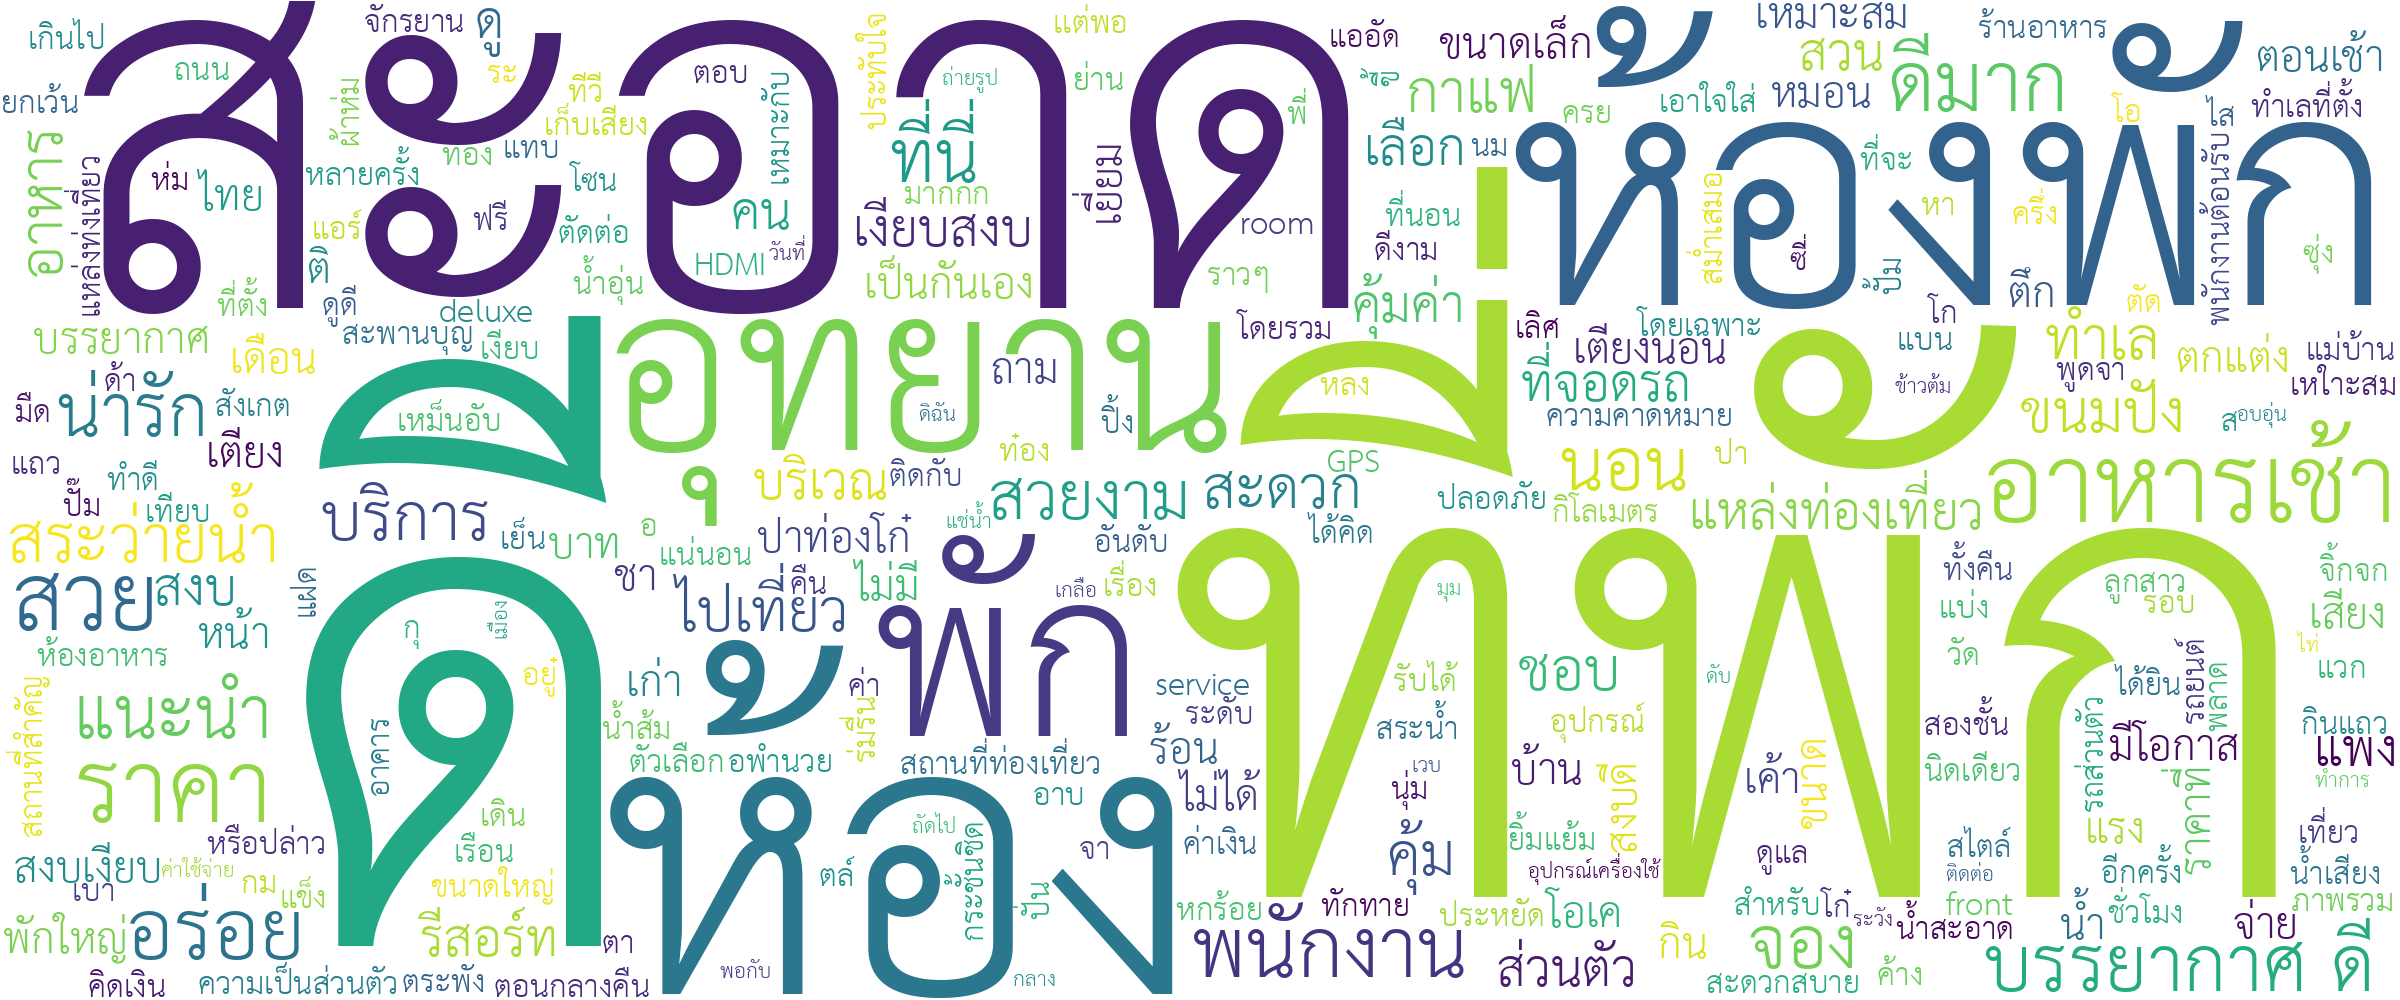

In [47]:
wordcloud.to_image()